In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

# проверка подключения gpu
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
 raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Набор данных IMDb, содержащий оцифрованные отзывы на
фильмы, размеченные на два класса: позитивные и негативные.

In [ ]:
# загрузка датасета
from keras.datasets import imdb
vocabulary_size = 5000
index_from = 3
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=vocabulary_size,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=31,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from)

print('Размерность входных обучающих данных:', X_train.shape)
print('Размерность входных тестовых данных:', X_test.shape)
print('Размерность выходных обучающих данных:', y_train.shape)
print('Размерность выходных тестовых данных:', y_test.shape)

Размерность входных обучающих данных: (25000,)
Размерность входных тестовых данных: (25000,)
Размерность выходных обучающих данных: (25000,)
Размерность выходных тестовых данных: (25000,)


In [ ]:
import numpy as np
review_as_indexes = np.array(X_train[31])
print('Отзыв в виде списка индексов:\n', review_as_indexes)
print('Длина отзыва:', len(review_as_indexes))
print('Метка класса:', '1-Positive' if y_train[31] == 1 else '0-Positive')

Отзыв в виде списка индексов:
 [   1    4 2112  512    9  150    6 4737  875   31   15    9   99  400
    2    8 2111   11    2    4  201    9    6    2    7  960 1807   15
   28   77    2   11   45  512 2670    4  927   28 4677  725   14 3279
   34 1855    6 1882   63   47   77    2    8   12    4    2    9   35
 1711  823 4296   15    2   45 1500   19 1987 1137   15    9    2   19
 1302    2  486    5    2  567    4 1317 2311 1223    2    9    2   17
    6    2  831    2    7 1092    5 1515 1234   34   27 1051  190 1223
    9    7  107    2   31   63    9    2  137    4   85    9    2   19
 3237    5    2   19   46  101    2   42    2   13  131    2  264   15
    4    2   47    4 1885 3137  177    7 1136 1757   32  183 1192   13
  100   97   35 3761 2590   23    4  201   21   13  528   48  126   50
    9    6 1114    2   11 4564    2 1787   18  134    2    2    2    2
 1711    2    5    4    2    2    2   80   30 4783  208  145   33   25]
Длина отзыва: 182
Метка класса: 1-Positive


In [ ]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()

# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

In [ ]:
review_as_text = ' '.join(id_to_word[i] for i in review_as_indexes)
print('Отзыв в виде текста:')
review_as_text

Отзыв в виде текста:


"<START> the gangster genre is now a worn subject one that is too often <UNK> to parody in <UNK> the series is a <UNK> of previous clichés that have been <UNK> in it's genre thankfully the writers have advanced upon this flaw by creating a realism which has been <UNK> to it the <UNK> is an epic crime saga that <UNK> it's content with psychological depth that is <UNK> with subtle <UNK> humor and <UNK> violence the key protagonist tony <UNK> is <UNK> as a <UNK> general <UNK> of fear and moral values by his crew however tony is of two <UNK> one which is <UNK> while the other is <UNK> with guilt and <UNK> with out any <UNK> or <UNK> i still <UNK> believe that the <UNK> has the finest ensemble cast of recent memory all things considered i could make an elaborate statement on the series but i won't if ever there is a visual <UNK> in global <UNK> search for these <UNK> <UNK> <UNK> <UNK> epic <UNK> and the <UNK> <UNK> <UNK> will be smiling right back at you"

In [ ]:
print('Максимальная длина отзыва:', len(max(X_train, key=len)))
print('Минимальная длина отзыва:', len(min(X_train, key=len)))

Максимальная длина отзыва: 2494
Минимальная длина отзыва: 11


In [ ]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences

max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', 
                        truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', 
                        truncating='post')

In [ ]:
print('Максимальная длина отзыва:', len(max(X_train, key=len)))
print('Минимальная длина отзыва:', len(min(X_train, key=len)))

Максимальная длина отзыва: 500
Минимальная длина отзыва: 500


In [ ]:
review_as_indexes = np.array(X_train[31])
print('Отзыв в виде списка индексов:\n', review_as_indexes)
print('Длина отзыва:', *review_as_indexes.shape)
print('Метка класса:', '1-Positive' if y_train[31] == 1 else '0-Positive')

Отзыв в виде списка индексов:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 

Список индексов дополнился нулевыми значениями до длины 500, принадлежность к классу осталась прежняя

In [ ]:
print('Обучающие данные:\n', X_train)
print('Тестовые данные:\n', X_test)
print('Размерность входных обучающих данных:', X_train.shape)
print('Размерность входных тестовых данных:', X_test.shape)

Обучающие данные:
 [[   0    0    0 ...    2 4050    2]
 [   0    0    0 ...  721   90  180]
 [   0    0    0 ... 1114    2  174]
 ...
 [   1 1065 2022 ...    7 1514    2]
 [   0    0    0 ...    6  879  132]
 [   0    0    0 ...   12  152  157]]
Тестовые данные:
 [[   0    0    0 ...   10  342  158]
 [   0    0    0 ...    2   67   12]
 [   0    0    0 ... 1242 1095 1095]
 ...
 [   0    0    0 ...    4    2  136]
 [   0    0    0 ...   14   31  591]
 [   0    0    0 ...    7 3923  212]]
Размерность входных обучающих данных: (25000, 500)
Размерность входных тестовых данных: (25000, 500)


In [ ]:
from tensorflow.keras import layers

# создаем модель
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=len(word_to_id), output_dim=32, 
                           input_length=max_words))
model.add(layers.LSTM(units=100))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           2834816   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,888,117
Trainable params: 2,888,117
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# компилируем и обучаем модель
batch_size = 64
epochs = 5
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.1, batch_size=batch_size, epochs=epochs)

Epoch 1/5
352/352 [==============================] - 17s 29ms/step - loss: 0.5138 - accuracy: 0.7343 - val_loss: 0.4744 - val_accuracy: 0.7912
Epoch 2/5
352/352 [==============================] - 10s 29ms/step - loss: 0.3747 - accuracy: 0.8352 - val_loss: 0.3331 - val_accuracy: 0.8596
Epoch 3/5
352/352 [==============================] - 10s 29ms/step - loss: 0.3103 - accuracy: 0.8716 - val_loss: 0.3401 - val_accuracy: 0.8616
Epoch 4/5
352/352 [==============================] - 10s 29ms/step - loss: 0.2379 - accuracy: 0.9089 - val_loss: 0.3225 - val_accuracy: 0.8664
Epoch 5/5
352/352 [==============================] - 10s 29ms/step - loss: 0.2091 - accuracy: 0.9209 - val_loss: 0.3779 - val_accuracy: 0.8784


In [ ]:
# оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

782/782 [==============================] - 9s 11ms/step - loss: 0.3757 - accuracy: 0.8699
Loss on test data: 0.3757077753543854
Accuracy on test data: 0.8698800206184387


In [ ]:
# предсказанные метки классов
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]

# отчет о качестве классификации
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], 
                            target_names=['Negative', 'Positive']))

782/782 [==============================] - 6s 8ms/step
              precision    recall  f1-score   support

    Negative       0.90      0.83      0.86     12500
    Positive       0.84      0.91      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



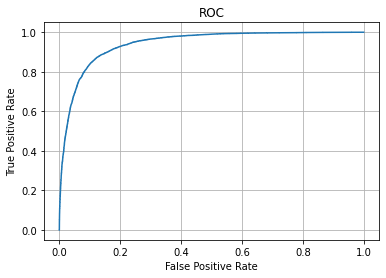

Area under ROC is 0.9417105024000001


In [ ]:
# строим roc-кривую и вычисляем показатель roc-auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under ROC is', auc(fpr, tpr))

In [ ]:
from sklearn.metrics import roc_auc_score
print('AUC ROC:', roc_auc_score(y_test, y_score))

AUC ROC: 0.9417105024000001


Результаты применения RNN были оценены по метрикам качества accuracy, precision, recall, f1-score и roc-auc. В целом, все показатели имеют достаточно неплохие значения, близкие к 1. Из этого следует, что модель обучилась удачно.